In [76]:
import os
import argparse
import pandas as pd
import numpy as np
import random
from mpl_toolkits import mplot3d
import os.path
import pickle
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from Agents.bayesian_agent import BayesianAgent

In [107]:
# change the inputs here !!! #
true_prob = 0.8
num_agents = 500
num_iteration = 500
budget = 0.3
# change the inputs here !!! #

folder = 'sim_res_budget_{}_iter_{}_prob_{}_agentnum_{}'.format(budget, num_iteration, true_prob, num_agents)
init_budget_path = '{}/initial_budget.pickle'.format(folder)
init_belief_path = '{}/initial_belief.pickle'.format(folder)
profit_path = '{}/profit.pickle'.format(folder)

In [108]:
if not os.path.exists(folder):
        os.makedirs(folder)

In [109]:
if (os.path.isfile(init_budget_path) and os.path.isfile(init_belief_path) and os.path.isfile(profit_path)):
    with open(init_budget_path, 'rb') as f:
        agent_initial_budget = pickle.load(f)
    with open(init_belief_path, 'rb') as f:
        agent_initial_beliefs = pickle.load(f)
    with open(profit_path, 'rb') as f:
        agent_profit = pickle.load(f)
else:
    true_outcomes = bernoulli.rvs(size=num_iteration,p=1-true_prob)
    # do the same for the scenario where the agents are not constrained by budgets
    # and the scenario where the agents are constrained by budgets
    # initialize the beliefs of each agents (Uniform distribution between 0 & 1)
    agent_initial_beliefs = np.random.uniform(size=(num_agents,))
    if (budget):
        agent_initial_budget = np.random.uniform(low=0.0, high=budget, size=(num_agents,))
    agent_profit = np.zeros((num_agents, ))
    agent_idx_list = list(np.arange(num_agents))
    for trial in range(num_iteration):
        true_outcome = true_outcomes[trial]
        agents = []
        if (budget):
            for i in range(num_agents):
                agents.append(BayesianAgent(agent_initial_beliefs[i], agent_initial_budget[i]))
        else:
            for i in range(num_agents):
                agents.append(BayesianAgent(agent_initial_beliefs[i]))
        market_belief = 0.5 # initial belief of the market maker
        iter = 0
        random.shuffle(agent_idx_list)
        while (iter <  num_agents):
            agent_idx = agent_idx_list[iter]
            # agent update belief based on market prices
            agent = agents[agent_idx]
            if (budget):
                agent.agent_belief_update(market_belief)
            agent.agent_profit_update(market_belief)
            market_belief = agent.belief
            iter += 1

        agent_current_beliefs = []
        agent_temp_profit = []
        for i in range(num_agents):
            agent_profit[i] += agents[i].profit[true_outcome]
            agent_current_beliefs.append(agents[i].belief)
            agent_temp_profit.append(agents[i].profit[true_outcome])
        # plot the graph of the agents' profit against the agents' current belief
#         plt.scatter(agent_current_beliefs, agent_temp_profit)
#         plt.xlabel('Agent current beliefs on outcome 0 (the first outcome)')
#         plt.ylabel('Agent earned profit')
#         plt.title('Agents\' profits on the {}-th trial when outcome is {}'.format(trial, true_outcome))
#         plt.savefig('./{}/profit_curr_belief_trial_{}.png'.format(folder, trial))
#         plt.close()
    with open(init_budget_path, 'wb') as f:
        pickle.dump(agent_initial_budget, f)
    with open(init_belief_path, 'wb') as f:
        pickle.dump(agent_initial_beliefs, f)
    with open(profit_path, 'wb') as f:
        pickle.dump(agent_profit, f)

<IPython.core.display.Javascript object>


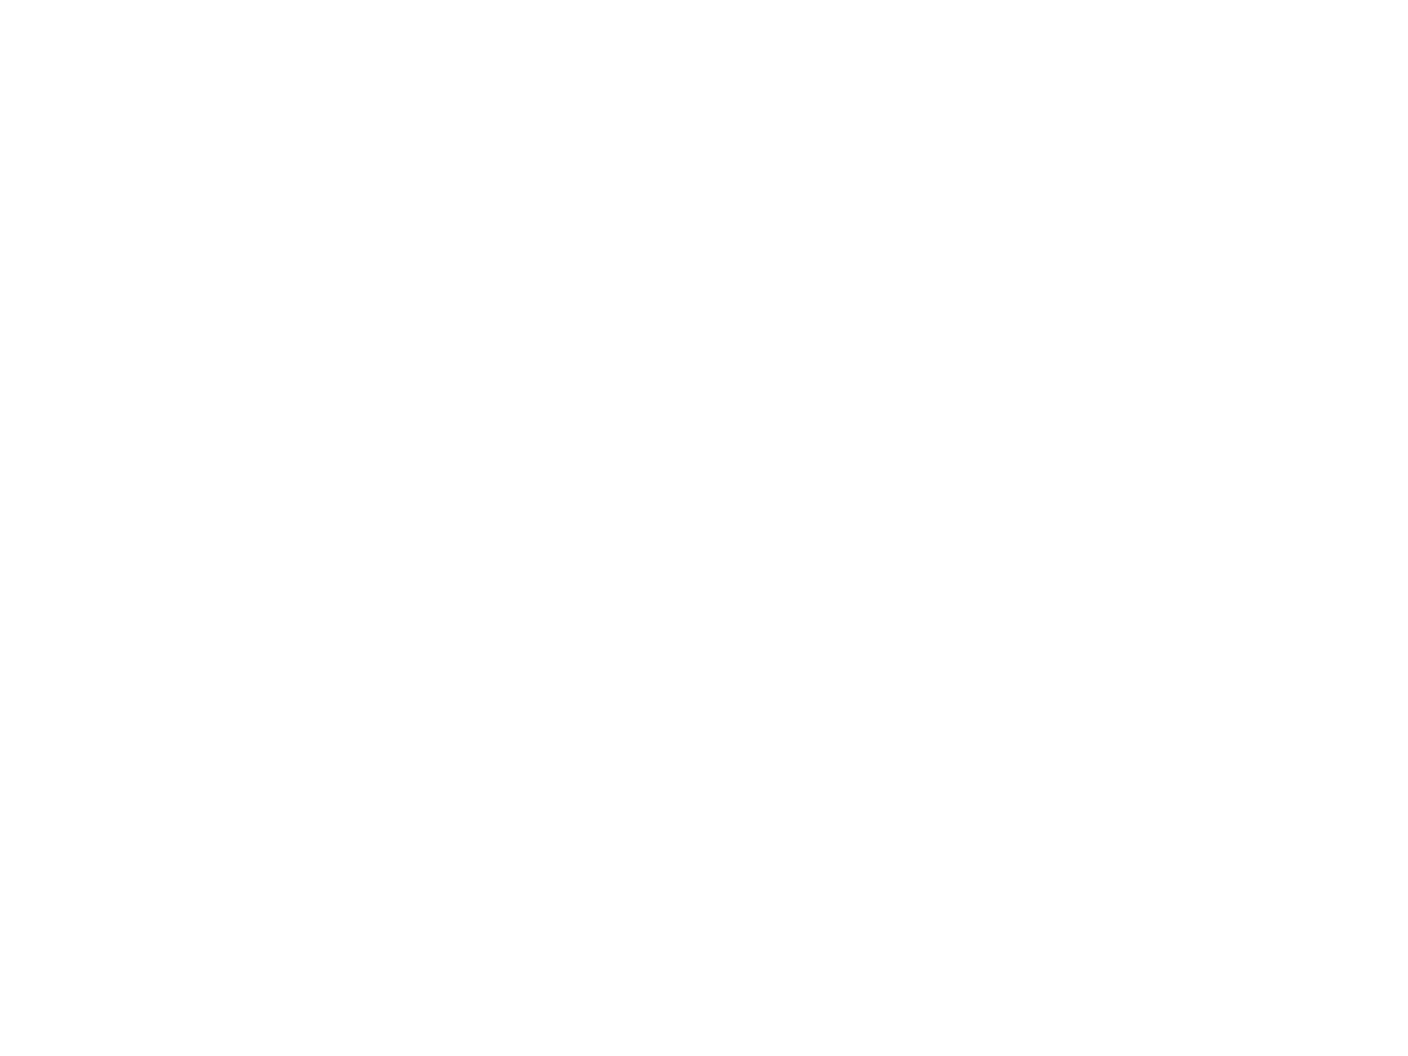

In [110]:
# plot the graph of the agents' profit against the agents' initial belief
plt.scatter(agent_initial_beliefs, agent_profit / num_iteration)
plt.xlabel('Agent initial belief on outcome 0 (the first outcome)')
plt.ylabel('Agent earned profit')
plt.title('Agents\' profits when true probability for outcome 0 is {} (num_iter = {})'.format(true_prob, num_iteration))
plt.savefig('./{}/profit_init_belief_prob_{}_iter_{}.png'.format(folder, true_prob, num_iteration))
plt.close()

<IPython.core.display.Javascript object>


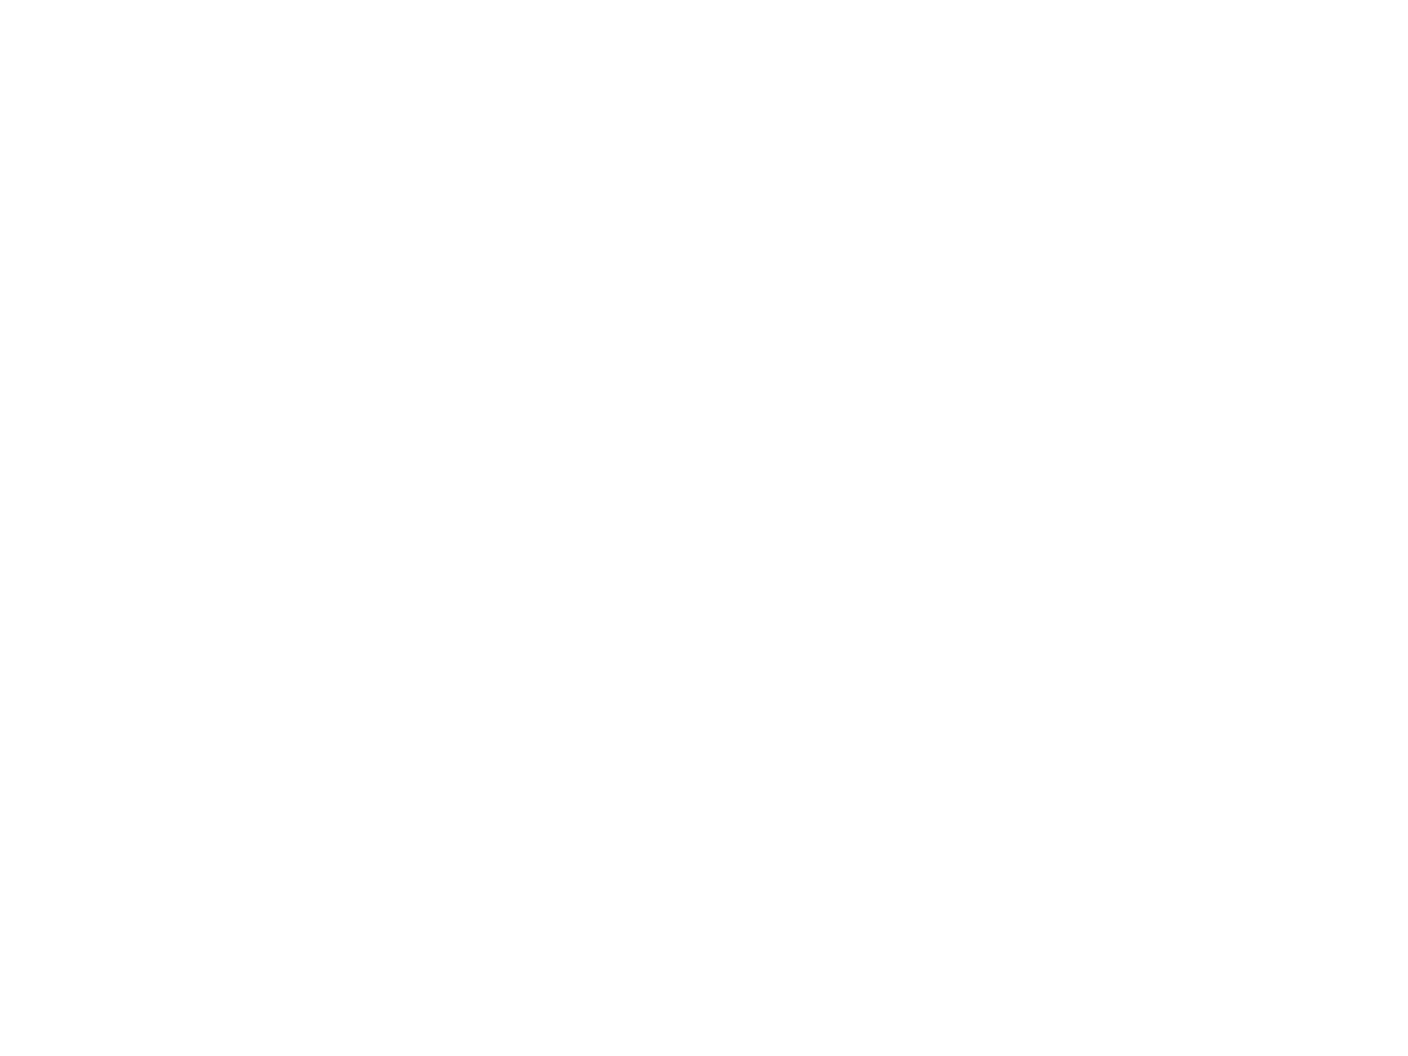

In [111]:
if (budget):
    plt.scatter(agent_initial_budget, agent_profit / num_iteration)
    plt.xlabel('Agent initial budget')
    plt.ylabel('Agent earned profit')
    plt.title('Agents\' profits when true probability for outcome 0 is {} (num_iter = {})'.format(true_prob, num_iteration))
    plt.savefig('./{}/profit_init_budget_prob_{}_iter_{}.png'.format(folder, true_prob, num_iteration))
    plt.close()

<IPython.core.display.Javascript object>


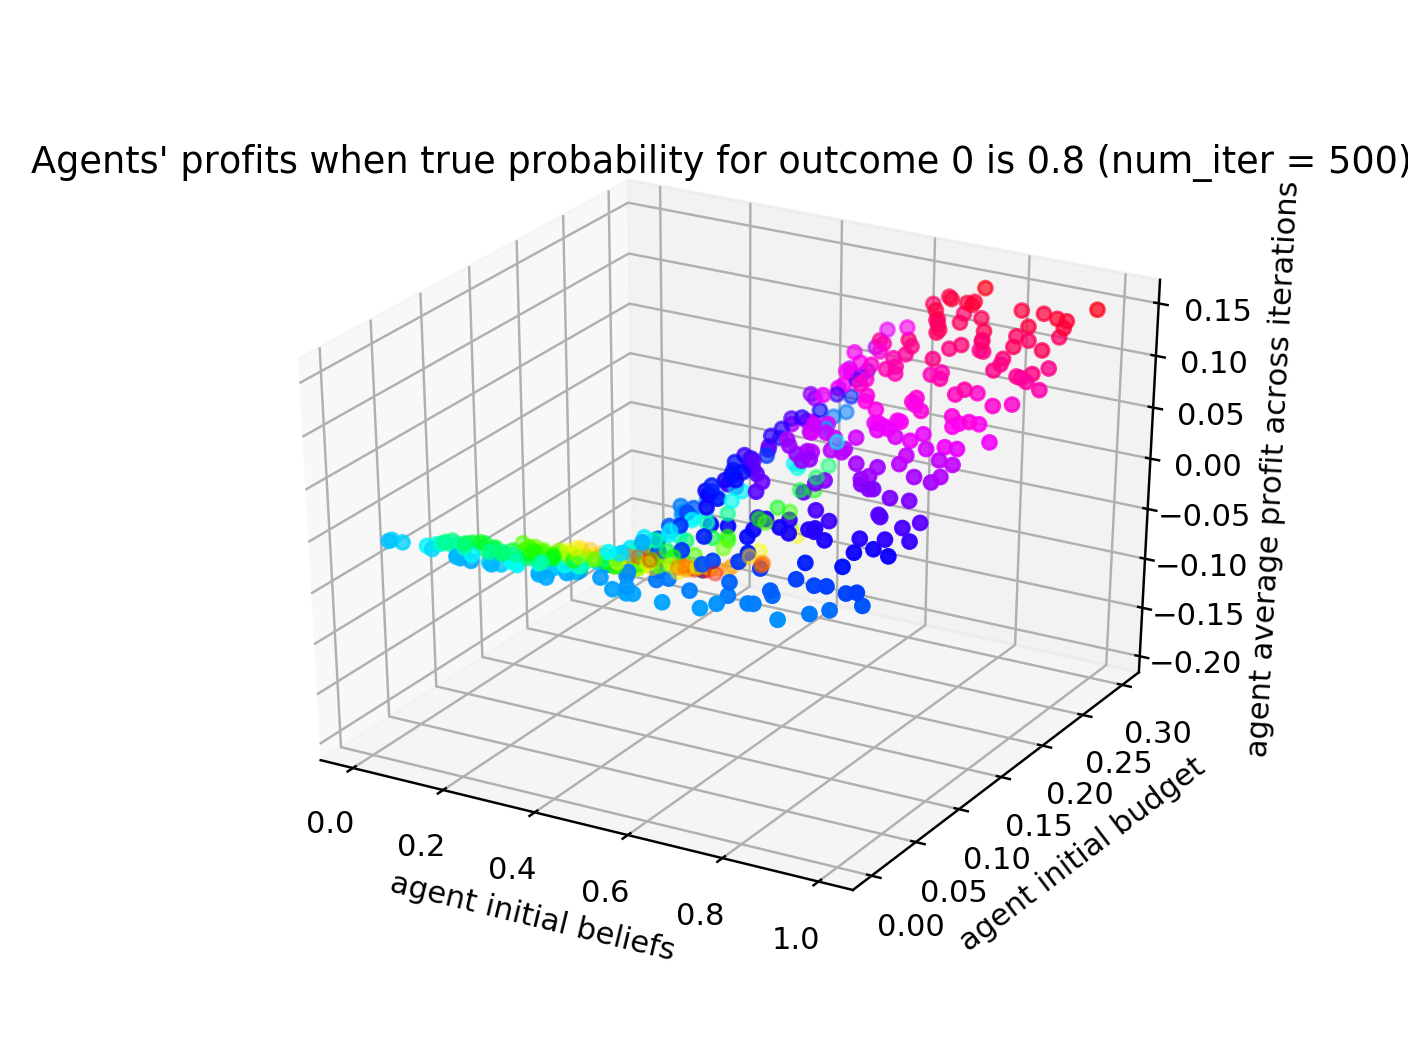

In [112]:
%matplotlib notebook
if (budget):
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter3D(agent_initial_beliefs, agent_initial_budget,\
     agent_profit / num_iteration, c=agent_profit / num_iteration, cmap='hsv');
    ax.set_xlabel('agent initial beliefs')
    ax.set_ylabel('agent initial budget')
    ax.set_zlabel('agent average profit across iterations')
    plt.title('Agents\' profits when true probability for outcome 0 is {} (num_iter = {})'.format(true_prob, num_iteration))
    plt.savefig('./{}/profit_prob_{}_iter_{}_3d.png'.format(folder, true_prob, num_iteration))

In [113]:
plt.close()